---
## 1. Import Libraries & Load Data

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load dataset
df = pd.read_csv('../data/raw/insurance.csv')

print(f"✅ Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nOriginal Features: {list(df.columns)}")

# Remove duplicates if any
original_count = len(df)
df = df.drop_duplicates()
print(f"\n🔄 Removed {original_count - len(df)} duplicate rows")

df.head()

✅ Dataset loaded: 1338 rows × 7 columns

Original Features: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

🔄 Removed 1 duplicate rows


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
## 2. Age-Based Features

Creating age groups to capture non-linear relationships with healthcare costs.

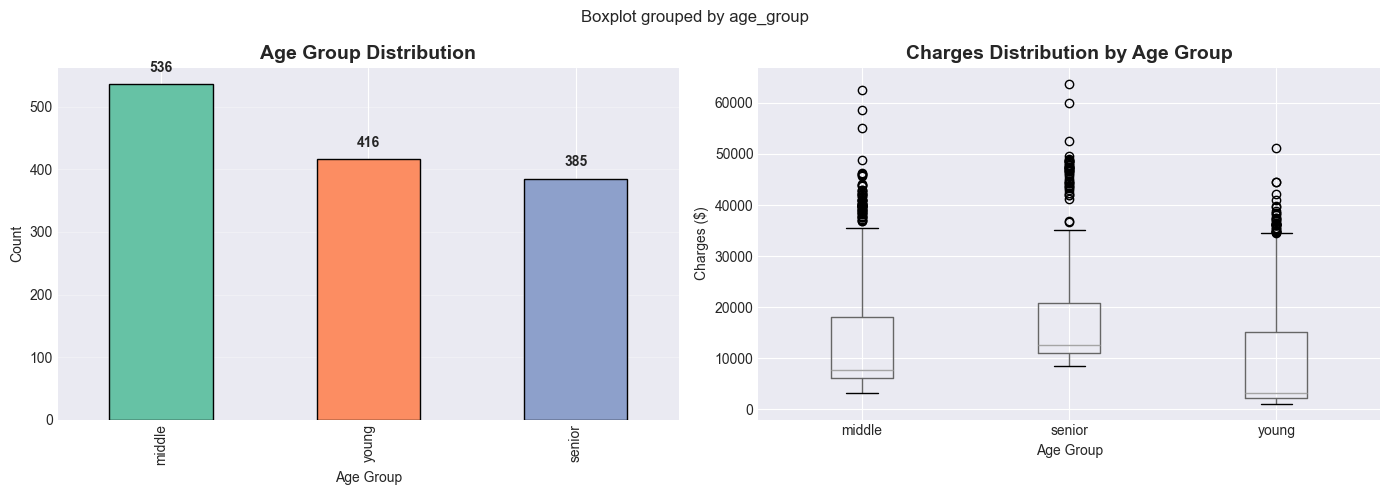


📊 Age Group Statistics:
               mean    median  count
age_group                           
middle     13123.59   7769.40    536
senior     17902.55  12629.90    385
young       9200.62   3220.37    416

✅ Age-based features created!


In [3]:
# Create age group categories
def categorize_age(age):
    if age < 30:
        return 'young'
    elif age < 50:
        return 'middle'
    else:
        return 'senior'

df['age_group'] = df['age'].apply(categorize_age)

# Visualize age groups
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age group distribution
ax = axes[0]
age_group_counts = df['age_group'].value_counts()
age_group_counts.plot(kind='bar', ax=ax, color=['#66c2a5', '#fc8d62', '#8da0cb'], edgecolor='black')
ax.set_title('Age Group Distribution', fontweight='bold', fontsize=14)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(age_group_counts):
    ax.text(i, v + 20, str(v), ha='center', fontweight='bold')

# Charges by age group
ax = axes[1]
df.boxplot(column='charges', by='age_group', ax=ax)
ax.set_title('Charges Distribution by Age Group', fontweight='bold', fontsize=14)
ax.set_xlabel('Age Group')
ax.set_ylabel('Charges ($)')
plt.sca(ax)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n📊 Age Group Statistics:")
print(df.groupby('age_group')['charges'].agg(['mean', 'median', 'count']).round(2))

print("\n✅ Age-based features created!")

---
## 3. BMI-Based Features

Creating BMI categories based on WHO standards:
- Underweight: BMI < 18.5
- Normal: 18.5 ≤ BMI < 25
- Overweight: 25 ≤ BMI < 30
- Obese: BMI ≥ 30

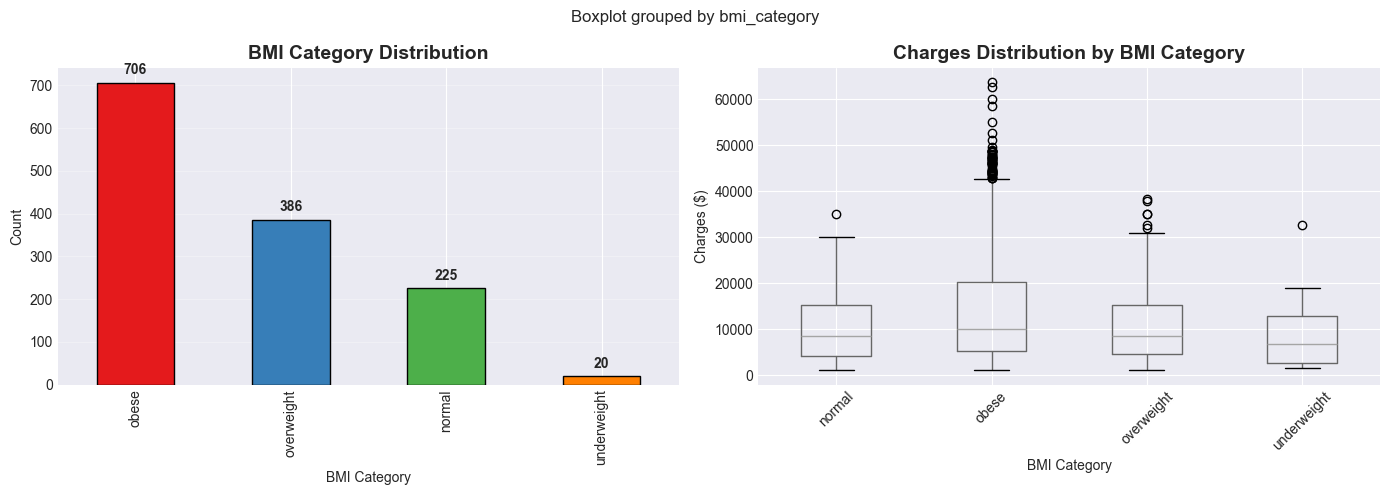


📊 BMI Category Statistics:
                  mean    median  count
bmi_category                           
normal        10409.34   8603.82    225
obese         15572.04  10003.65    706
overweight    10987.51   8659.38    386
underweight    8852.20   6759.26     20

✅ BMI-based features created!


In [4]:
# Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# Visualize BMI categories
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BMI category distribution
ax = axes[0]
bmi_counts = df['bmi_category'].value_counts()
bmi_counts.plot(kind='bar', ax=ax, color=['#e41a1c', '#377eb8', '#4daf4a', '#ff7f00'], edgecolor='black')
ax.set_title('BMI Category Distribution', fontweight='bold', fontsize=14)
ax.set_xlabel('BMI Category')
ax.set_ylabel('Count')
ax.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(bmi_counts):
    ax.text(i, v + 20, str(v), ha='center', fontweight='bold')

# Charges by BMI category
ax = axes[1]
df.boxplot(column='charges', by='bmi_category', ax=ax)
ax.set_title('Charges Distribution by BMI Category', fontweight='bold', fontsize=14)
ax.set_xlabel('BMI Category')
ax.set_ylabel('Charges ($)')
plt.sca(ax)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 BMI Category Statistics:")
print(df.groupby('bmi_category')['charges'].agg(['mean', 'median', 'count']).round(2))

print("\n✅ BMI-based features created!")

---
## 4. Interaction Features

Creating interaction terms to capture combined effects of multiple features.

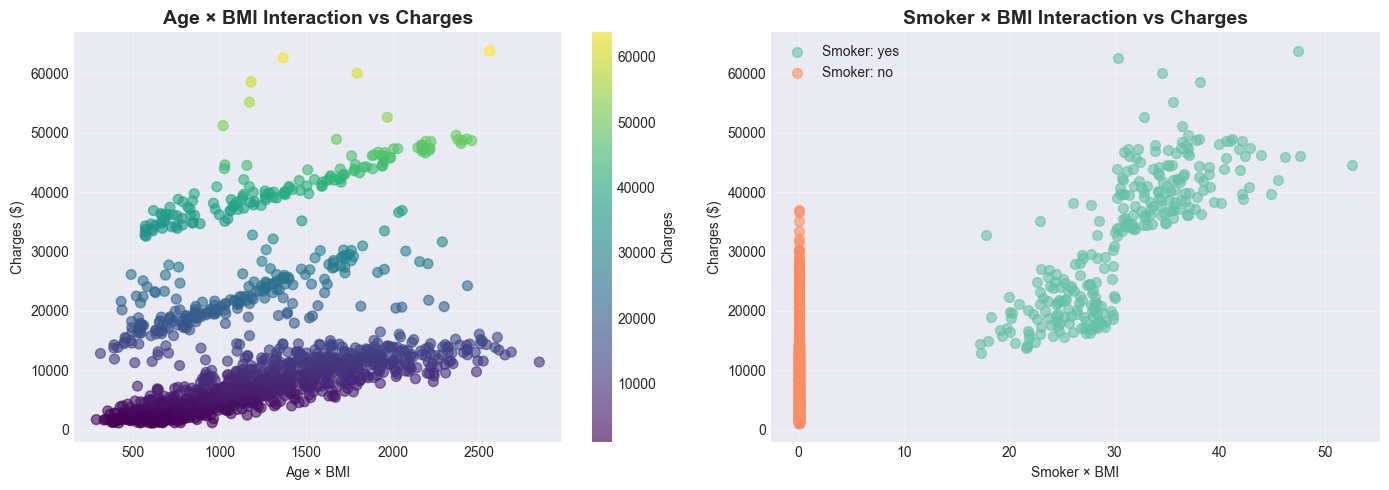


📊 Interaction Feature Statistics:
Age × BMI - Mean: 1212.05, Std: 522.52
Smoker × BMI - Mean: 6.29, Std: 12.72

✅ Interaction features created!


In [5]:
# Create interaction features
df['age_bmi_interaction'] = df['age'] * df['bmi']
df['smoker_bmi_interaction'] = (df['smoker'] == 'yes').astype(int) * df['bmi']

# Visualize interaction effects
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age × BMI interaction
ax = axes[0]
scatter = ax.scatter(df['age_bmi_interaction'], df['charges'], 
                    c=df['charges'], cmap='viridis', alpha=0.6, s=50)
ax.set_title('Age × BMI Interaction vs Charges', fontweight='bold', fontsize=14)
ax.set_xlabel('Age × BMI')
ax.set_ylabel('Charges ($)')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Charges')

# Smoker × BMI interaction
ax = axes[1]
for smoker in ['yes', 'no']:
    mask = df['smoker'] == smoker
    ax.scatter(df[mask]['smoker_bmi_interaction'], df[mask]['charges'], 
              label=f'Smoker: {smoker}', alpha=0.6, s=50)
ax.set_title('Smoker × BMI Interaction vs Charges', fontweight='bold', fontsize=14)
ax.set_xlabel('Smoker × BMI')
ax.set_ylabel('Charges ($)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interaction Feature Statistics:")
print(f"Age × BMI - Mean: {df['age_bmi_interaction'].mean():.2f}, Std: {df['age_bmi_interaction'].std():.2f}")
print(f"Smoker × BMI - Mean: {df['smoker_bmi_interaction'].mean():.2f}, Std: {df['smoker_bmi_interaction'].std():.2f}")

print("\n✅ Interaction features created!")

---
## 5. Risk Indicators

Creating binary flags for high-risk combinations.


📊 Risk Indicator Analysis:
        Risk Factor  Count  Percentage  Avg Charges
0            Smoker    274       20.49     32050.23
1  Obese (BMI ≥ 30)    706       52.80     15572.04
2    Smoker + Obese    145       10.85     41557.99
3      Has Children    764       57.14     13949.94


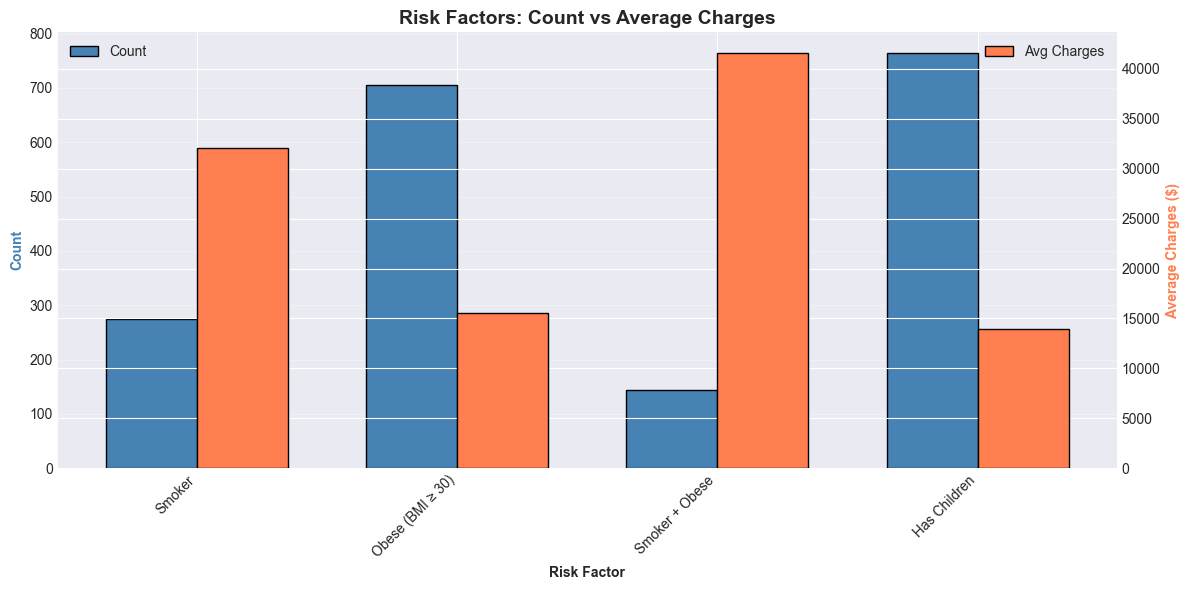


✅ Risk indicator features created!


In [6]:
# Create risk indicators
df['is_smoker'] = (df['smoker'] == 'yes').astype(int)
df['is_obese'] = (df['bmi'] >= 30).astype(int)
df['smoker_obese_risk'] = df['is_smoker'] & df['is_obese']
df['has_children'] = (df['children'] > 0).astype(int)

# Analyze risk combinations
print("\n📊 Risk Indicator Analysis:")
print("=" * 70)

risk_analysis = pd.DataFrame({
    'Risk Factor': ['Smoker', 'Obese (BMI ≥ 30)', 'Smoker + Obese', 'Has Children'],
    'Count': [
        df['is_smoker'].sum(),
        df['is_obese'].sum(),
        df['smoker_obese_risk'].sum(),
        df['has_children'].sum()
    ],
    'Percentage': [
        (df['is_smoker'].sum() / len(df) * 100),
        (df['is_obese'].sum() / len(df) * 100),
        (df['smoker_obese_risk'].sum() / len(df) * 100),
        (df['has_children'].sum() / len(df) * 100)
    ],
    'Avg Charges': [
        df[df['is_smoker'] == 1]['charges'].mean(),
        df[df['is_obese'] == 1]['charges'].mean(),
        df[df['smoker_obese_risk'] == 1]['charges'].mean(),
        df[df['has_children'] == 1]['charges'].mean()
    ]
})

print(risk_analysis.round(2))

# Visualize risk factors
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(risk_analysis))
width = 0.35

bars1 = ax.bar(x - width/2, risk_analysis['Count'], width, label='Count', color='steelblue', edgecolor='black')
ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, risk_analysis['Avg Charges'], width, label='Avg Charges', color='coral', edgecolor='black')

ax.set_xlabel('Risk Factor', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold', color='steelblue')
ax2.set_ylabel('Average Charges ($)', fontweight='bold', color='coral')
ax.set_title('Risk Factors: Count vs Average Charges', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(risk_analysis['Risk Factor'], rotation=45, ha='right')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Risk indicator features created!")

---
## 6. Encoding Categorical Variables

Converting categorical variables to numerical format.

In [7]:
# Create a copy for encoding
df_encoded = df.copy()

# Label encoding for binary features
label_encoders = {}

binary_features = ['sex', 'smoker']
for feature in binary_features:
    le = LabelEncoder()
    df_encoded[feature] = le.fit_transform(df_encoded[feature])
    label_encoders[feature] = le
    print(f"\n{feature.upper()} encoding:")
    for idx, class_name in enumerate(le.classes_):
        print(f"  {class_name} → {idx}")

# One-hot encoding for region (multi-class)
region_dummies = pd.get_dummies(df_encoded['region'], prefix='region', drop_first=True)
df_encoded = pd.concat([df_encoded, region_dummies], axis=1)
df_encoded = df_encoded.drop('region', axis=1)

print("\n\nREGION one-hot encoding (with drop_first=True):")
print(f"  Original regions: {df['region'].unique().tolist()}")
print(f"  Encoded columns: {[col for col in df_encoded.columns if 'region_' in col]}")

# One-hot encode age_group and bmi_category
age_group_dummies = pd.get_dummies(df_encoded['age_group'], prefix='age_group', drop_first=True)
bmi_category_dummies = pd.get_dummies(df_encoded['bmi_category'], prefix='bmi_category', drop_first=True)

df_encoded = pd.concat([df_encoded, age_group_dummies, bmi_category_dummies], axis=1)
df_encoded = df_encoded.drop(['age_group', 'bmi_category'], axis=1)

print("\n✅ Categorical variables encoded successfully!")
print(f"\n📊 Total features after encoding: {len(df_encoded.columns)}")
print(f"Feature list: {list(df_encoded.columns)}")


SEX encoding:
  female → 0
  male → 1

SMOKER encoding:
  no → 0
  yes → 1


REGION one-hot encoding (with drop_first=True):
  Original regions: ['southwest', 'southeast', 'northwest', 'northeast']
  Encoded columns: ['region_northwest', 'region_southeast', 'region_southwest']

✅ Categorical variables encoded successfully!

📊 Total features after encoding: 20
Feature list: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'age_bmi_interaction', 'smoker_bmi_interaction', 'is_smoker', 'is_obese', 'smoker_obese_risk', 'has_children', 'region_northwest', 'region_southeast', 'region_southwest', 'age_group_senior', 'age_group_young', 'bmi_category_obese', 'bmi_category_overweight', 'bmi_category_underweight']


---
## 7. Feature Scaling

Normalizing features using StandardScaler for better model performance.


📊 Feature matrix shape: (1337, 19)
📊 Target vector shape: (1337,)

✂️ Train-Test Split:
   Training set: 1069 samples
   Test set: 268 samples
   Split ratio: 80% train, 20% test

📏 Features scaled using StandardScaler:
   Mean of scaled features: 0.000000
   Std of scaled features: 1.000468


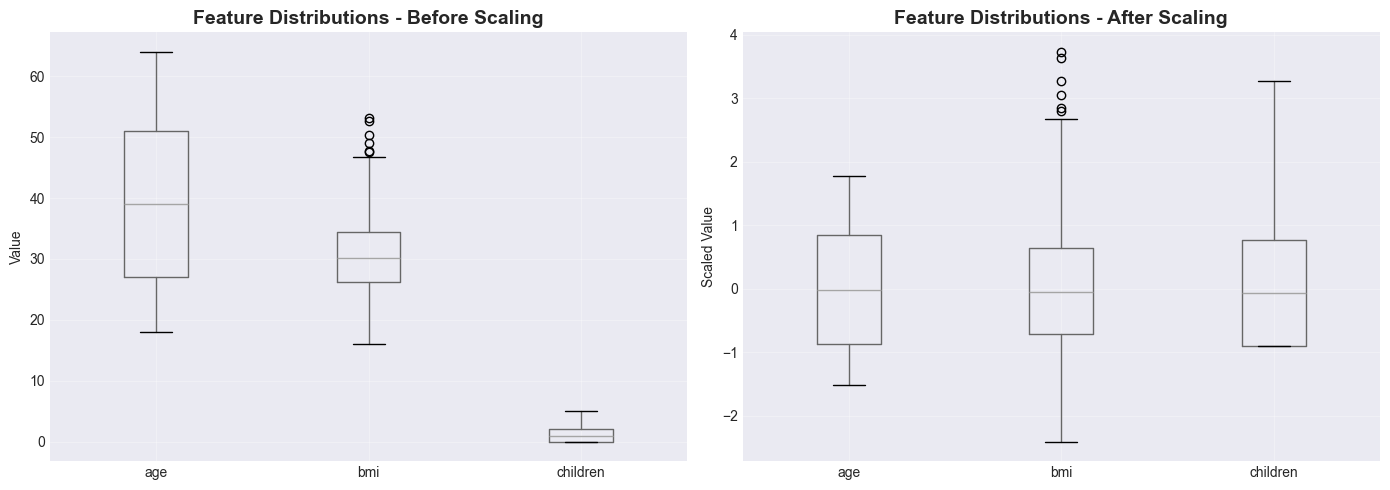


✅ Feature scaling completed!


In [8]:
# Separate features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

print(f"\n📊 Feature matrix shape: {X.shape}")
print(f"📊 Target vector shape: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✂️ Train-Test Split:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")
print(f"   Split ratio: {(X_train.shape[0] / len(X) * 100):.0f}% train, {(X_test.shape[0] / len(X) * 100):.0f}% test")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n📏 Features scaled using StandardScaler:")
print(f"   Mean of scaled features: {X_train_scaled.mean().mean():.6f}")
print(f"   Std of scaled features: {X_train_scaled.std().mean():.6f}")

# Visualize scaling effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
ax = axes[0]
X_train[['age', 'bmi', 'children']].boxplot(ax=ax)
ax.set_title('Feature Distributions - Before Scaling', fontweight='bold', fontsize=14)
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)

# After scaling
ax = axes[1]
X_train_scaled[['age', 'bmi', 'children']].boxplot(ax=ax)
ax.set_title('Feature Distributions - After Scaling', fontweight='bold', fontsize=14)
ax.set_ylabel('Scaled Value')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Feature scaling completed!")

---
## 8. Save Processed Data

Saving all preprocessed data and artifacts for model training.

In [10]:
import os

# Create processed data directory
processed_dir = '../data/processed'
os.makedirs(processed_dir, exist_ok=True)

# Save train-test splits
X_train_scaled.to_csv(f'{processed_dir}/X_train.csv', index=False)
X_test_scaled.to_csv(f'{processed_dir}/X_test.csv', index=False)
y_train.to_csv(f'{processed_dir}/y_train.csv', index=False, header=['charges'])
y_test.to_csv(f'{processed_dir}/y_test.csv', index=False, header=['charges'])

# Save preprocessing artifacts
joblib.dump(scaler, f'{processed_dir}/scaler.pkl')
joblib.dump(label_encoders, f'{processed_dir}/label_encoders.pkl')
joblib.dump(list(X.columns), f'{processed_dir}/feature_names.pkl')

print("\n💾 Saved Files:")
print("=" * 70)
print(f"✅ X_train.csv - {X_train_scaled.shape}")
print(f"✅ X_test.csv - {X_test_scaled.shape}")
print(f"✅ y_train.csv - {y_train.shape}")
print(f"✅ y_test.csv - {y_test.shape}")
print(f"✅ scaler.pkl")
print(f"✅ label_encoders.pkl")
print(f"✅ feature_names.pkl")


💾 Saved Files:
✅ X_train.csv - (1069, 19)
✅ X_test.csv - (268, 19)
✅ y_train.csv - (1069,)
✅ y_test.csv - (268,)
✅ scaler.pkl
✅ label_encoders.pkl
✅ feature_names.pkl
